<a href="https://colab.research.google.com/github/Tanuka-Mondal/Fuzzy/blob/main/fuzzy_bell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy


     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e71ce48ca443f3181f1d610a08c0cdbb5c56be49c092adb8192e7457b57ea6fa
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:
import matplotlib.pyplot as plt

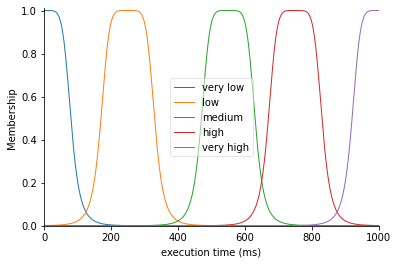

In [12]:
ei = ctrl.Antecedent(np.arange(0,1001,1),'execution time (ms)') #mili second
ei['very low'] = fuzzy.gbellmf(ei.universe,80,3,0)
ei['low'] = fuzzy.gbellmf(ei.universe,80,3,250)
ei['medium'] = fuzzy.gbellmf(ei.universe,80,3,550)
ei['high'] = fuzzy.gbellmf(ei.universe,80,3,750)
ei['very high'] = fuzzy.gbellmf(ei.universe,80,3,1000)
ei.view()

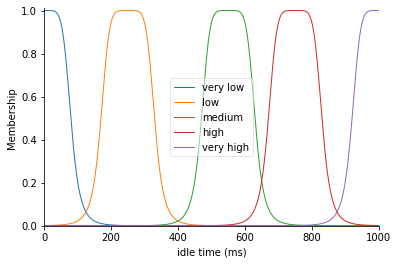

In [13]:
Ii = ctrl.Antecedent(np.arange(0,1001,1),'idle time (ms)')
Ii['very low'] = fuzzy.gbellmf(Ii.universe,80,3,0)
Ii['low'] = fuzzy.gbellmf(Ii.universe,80,3,250)
Ii['medium'] = fuzzy.gbellmf(Ii.universe,80,3,550)
Ii['high'] = fuzzy.gbellmf(Ii.universe,80,3,750)
Ii['very high'] = fuzzy.gbellmf(Ii.universe,80,3,1000)
Ii.view()

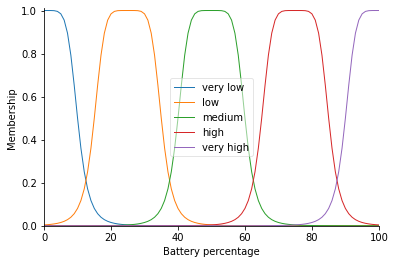

In [17]:
bi = ctrl.Antecedent(np.arange(0,101,1),'Battery percentage')
bi['very low'] = fuzzy.gbellmf(bi.universe,10,3,0)
bi['low'] = fuzzy.gbellmf(bi.universe,10,3,25)
bi['medium'] = fuzzy.gbellmf(bi.universe,10,3,50)
bi['high'] = fuzzy.gbellmf(bi.universe,10,3,75)
bi['very high'] = fuzzy.gbellmf(bi.universe,10,3,100)
bi.view()

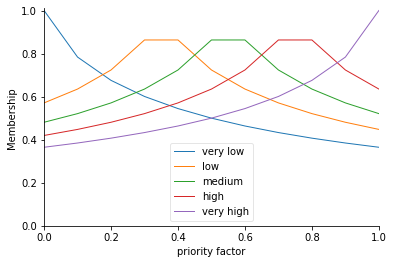

In [22]:
pi = ctrl.Antecedent(np.arange(0,1.1,0.1),'priority factor')
pi['very low'] = fuzzy.gbellmf(pi.universe,0.5,0.4,0)
pi['low'] = fuzzy.gbellmf(pi.universe,0.5,0.4,0.35)
pi['medium'] = fuzzy.gbellmf(pi.universe,0.5,0.4,0.55)
pi['high'] = fuzzy.gbellmf(pi.universe,0.5,0.4,0.75)
pi['very high'] = fuzzy.gbellmf(pi.universe,0.5,0.4,1)
pi.view()

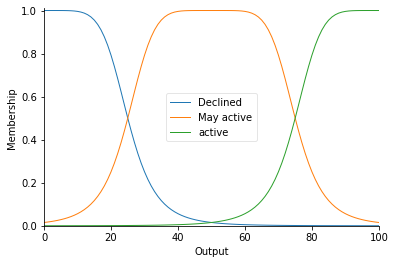

In [23]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
#names = ['Declined','May active','Active']
#si.automf(names = names)
si['Declined']=fuzzy.gbellmf(si.universe,25,3,0)
si['May active']=fuzzy.gbellmf(si.universe,25,3,50)
si['active']=fuzzy.gbellmf(si.universe,25,3,100)
si.view()

In [24]:
rule1 = ctrl.Rule(ei['very low'],si['active'])
rule2 = ctrl.Rule(ei['low'],si['active'])
rule3 = ctrl.Rule(ei['medium'],si['May active'])
rule4 = ctrl.Rule(ei['high'],si['Declined'])
rule5 = ctrl.Rule(ei['very high'],si['Declined'])
rule6 = ctrl.Rule(Ii['very low'] ,si['Declined'])
rule7 = ctrl.Rule(Ii['low'] ,si['Declined'])
rule8 = ctrl.Rule(Ii['medium'] ,si['May active'])
rule9 = ctrl.Rule(Ii['high'] ,si['active'])
rule10 = ctrl.Rule(Ii['very high'] ,si['active'])
rule11 = ctrl.Rule(bi['very low'] ,si['Declined'])
rule12 = ctrl.Rule(bi['low'] ,si['Declined'])
rule13 = ctrl.Rule(bi['medium'] ,si['May active'])
rule14 = ctrl.Rule(bi['high'] ,si['active'])
rule15 = ctrl.Rule(bi['very high'] ,si['active'])
rule16 = ctrl.Rule(pi['very low'] ,si['Declined'])
rule17 = ctrl.Rule(pi['low'] ,si['Declined'])
rule18 = ctrl.Rule(pi['medium'] ,si['May active'])
rule19 = ctrl.Rule(pi['high'] ,si['active'])
rule20 = ctrl.Rule(pi['very high'] ,si['active'])
rule21 = ctrl.Rule(ei['low'] & Ii['very low'],si['Declined'])
rule22 = ctrl.Rule(ei['medium'] & (Ii['very low'] | Ii['low']),si['Declined'])
rule23 = ctrl.Rule(ei['high'] & (Ii['very low'] | Ii['low'] | Ii['medium']),si['Declined'])
rule24 = ctrl.Rule(ei['very high'] & (Ii['very low'] | Ii['low'] | Ii['medium'] | Ii['high']),si['Declined'])

In [27]:
op = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24])
Sensor = ctrl.ControlSystemSimulation(op)
def SensorOutput(): 
  Sensor.input['execution time (ms)'] = float(input("execution time: "))
  Sensor.input['idle time (ms)'] = float(input("idle time: "))
  Sensor.input['priority factor'] = float(input("priority factor: "))
  Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
#print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  ei.view(sim=Sensor)
  Ii.view(sim=Sensor)
  pi.view(sim=Sensor)
  bi.view(sim=Sensor)
  si.view(sim=Sensor)

execution time: 50
idle time: 950
priority factor: 0.9
battery percentage: 98
chance of activation of sensor: 56.6146%


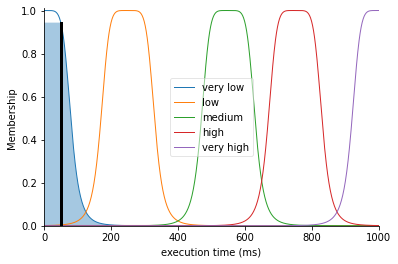

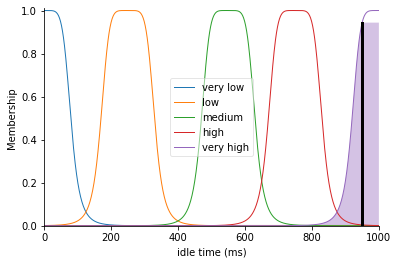

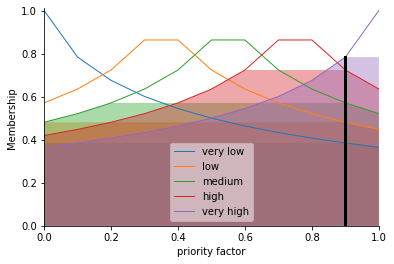

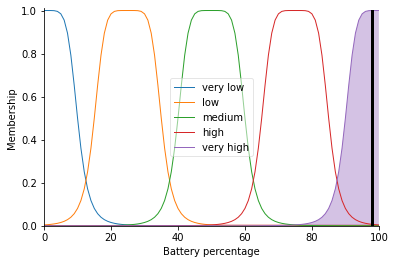

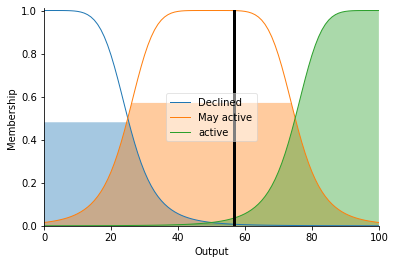

In [28]:
SensorOutput()

execution time: 950
idle time: 50
priority factor: 0.1
battery percentage: 10
chance of activation of sensor: 42.9672%


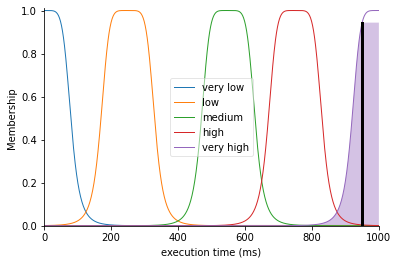

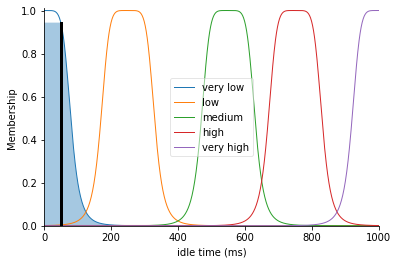

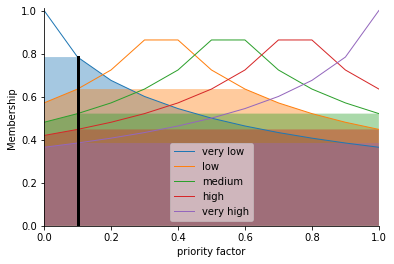

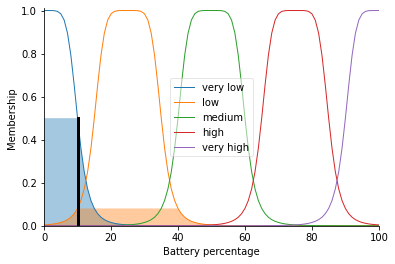

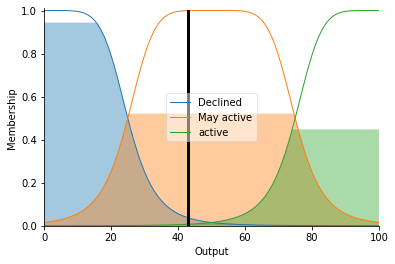

In [29]:
SensorOutput()